In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/2023-1 k=KUBIG NLP분반/005930.KS_5y.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-30,29700.0,30000.0,29680.0,30000.0,41.274914,10588400
1,2013-10-31,29960.0,30040.0,29300.0,29300.0,40.311840,12647050
2,2013-11-01,29800.0,30000.0,29360.0,30000.0,41.274914,11357700
3,2013-11-04,29840.0,30040.0,29780.0,29980.0,41.247398,10887800
4,2013-11-05,30040.0,30040.0,29440.0,29700.0,40.862167,8009300
...,...,...,...,...,...,...,...
1220,2018-10-23,43300.0,43450.0,42550.0,43050.0,43050.000000,9531231
1221,2018-10-24,43050.0,43100.0,42250.0,42550.0,42550.000000,13522825
1222,2018-10-25,40600.0,41550.0,40550.0,41000.0,41000.000000,19338170
1223,2018-10-26,41100.0,41300.0,40400.0,41000.0,41000.000000,14413864


In [4]:
length_data = len(data)     # data 행 개수
split_ratio = 0.7           # 0.7 / 0.3 으로 분리 -> 학습데이터 비율
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train 
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1225
Train data length : 858
Validation data lenth : 367


In [5]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # 날짜 변수로 변환 -> 시계열화 (시각화)
train_data

,Date,Open
0,2013-10-30,29700.0
1,2013-10-31,29960.0
2,2013-11-01,29800.0
3,2013-11-04,29840.0
4,2013-11-05,30040.0
...,...,...
853,2017-04-13,41660.0
854,2017-04-14,42160.0
855,2017-04-17,42000.0
856,2017-04-18,41680.0


In [6]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date']) # 시계열화
validation_data

,Date,Open
858,2017-04-20,40580.0
859,2017-04-21,40480.0
860,2017-04-24,41260.0
861,2017-04-25,41460.0
862,2017-04-26,42700.0
...,...,...
1220,2018-10-23,43300.0
1221,2018-10-24,43050.0
1222,2018-10-25,40600.0
1223,2018-10-26,41100.0


In [7]:
dataset_train = train_data.Open.values # open 컬럼에 있는 변수만 가져오기
dataset_train.shape

(858,)

In [8]:
# 1차원 -> 2차원 데이터로 변환
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(858, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) # min - max scaling 


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(858, 1)

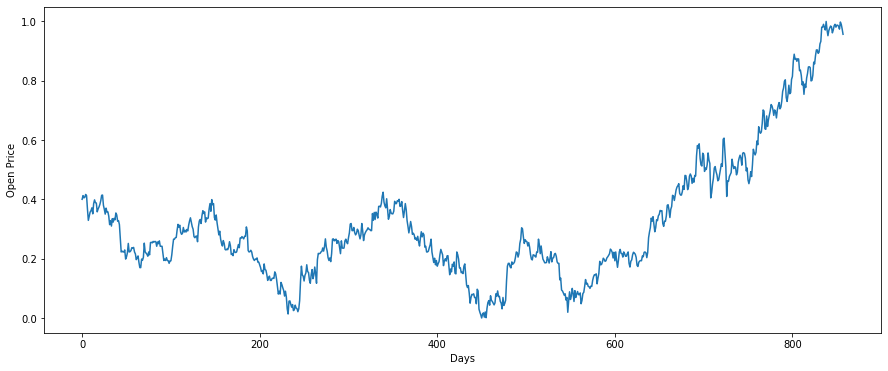

In [10]:
# 오픈 데이터 시각화 -> 0~1로 scale되어 있음
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.show()

In [11]:
X_train = []
y_train = []

time_step = 50 # 그 다음 값을 예측하기 위해(51번째) 50개의 데이터 사용 -> 50개를 활용해서 51번째 데이터를 에측하는 패턴

for i in range(time_step, length_train): # 한칸씩 이동하면서 계속 다음 값 예측 반복
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (808, 50)
Shape of y_train before reshape : (808,)


In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (808, 50, 1)
Shape of y_train after reshape : (808, 1)


In [14]:
# 50번째 값을 예측하기 위한 49개의 데이터 값
X_train[0]

array([[0.40019194],
       [0.41266795],
       [0.4049904 ],
       [0.40690979],
       [0.41650672],
       [0.41266795],
       [0.36756238],
       [0.32917466],
       [0.34261036],
       [0.35700576],
       [0.36180422],
       [0.37140115],
       [0.3512476 ],
       [0.38579655],
       [0.39827255],
       [0.38867562],
       [0.38771593],
       [0.35796545],
       [0.36756238],
       [0.37428023],
       [0.38291747],
       [0.39539347],
       [0.41362764],
       [0.41458733],
       [0.38003839],
       [0.36660269],
       [0.35028791],
       [0.37044146],
       [0.35700576],
       [0.35796545],
       [0.34357006],
       [0.31477927],
       [0.32821497],
       [0.30998081],
       [0.33493282],
       [0.32341651],
       [0.33589251],
       [0.33109405],
       [0.35412668],
       [0.34740883],
       [0.32629559],
       [0.32821497],
       [0.31477927],
       [0.26871401],
       [0.22264875],
       [0.22552783],
       [0.22264875],
       [0.222

In [15]:
# 50번째 값(예측해야할 대상)
y_train[0]

array([0.20633397])

In [18]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# RNN 초기화
regressor = Sequential()

# 첫번째 RNN 계층 추가 + dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# 2번째 RNN 계층 추가

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# 3번째 RNN 계층 추가

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# 4번째 RNN 계층 추가

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# 출력층 계층 추가
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN # 배치 크기 = 32, epoch = 50
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
26/26 [==============================] - 9s 235ms/step - loss: 0.5168 - accuracy: 0.0025
Epoch 2/50
26/26 [==============================] - 10s 380ms/step - loss: 0.3626 - accuracy: 0.0025
Epoch 3/50
26/26 [==============================] - 4s 159ms/step - loss: 0.2521 - accuracy: 0.0012
Epoch 4/50
26/26 [==============================] - 8s 320ms/step - loss: 0.2194 - accuracy: 0.0025
Epoch 5/50
26/26 [==============================] - 5s 199ms/step - loss: 0.1613 - accuracy: 0.0012
Epoch 6/50
26/26 [==============================] - 5s 181ms/step - loss: 0.1233 - accuracy: 0.0025
Epoch 7/50
26/26 [==============================] - 6s 220ms/step - loss: 0.1132 - accuracy: 0.0025
Epoch 8/50
26/26 [==============================] - 4s 152ms/step - loss: 0.1143 - accuracy: 0.0025
Epoch 9/50
26/26 [==============================] - 6s 251ms/step - loss: 0.0869 - accuracy: 0.0025
Epoch 10/50
26/26 [==============================] - 8s 320ms/step - loss: 0.0709 - accuracy: 0.002

In [20]:
# Losses
history.history["loss"]

# 꾸준히 줄어들고 있다. 

[0.5168386101722717,
 0.36261993646621704,
 0.2520577013492584,
 0.2193783074617386,
 0.16127672791481018,
 0.12327878177165985,
 0.11321045458316803,
 0.11426728218793869,
 0.08692004531621933,
 0.07085967808961868,
 0.06370643526315689,
 0.06263425946235657,
 0.05652350187301636,
 0.047401465475559235,
 0.043193064630031586,
 0.03962189704179764,
 0.03611866012215614,
 0.03624670207500458,
 0.029165953397750854,
 0.026435861364006996,
 0.026683498173952103,
 0.02484435774385929,
 0.021941134706139565,
 0.02092931605875492,
 0.018106237053871155,
 0.016706770285964012,
 0.016055647283792496,
 0.01535249687731266,
 0.014799843542277813,
 0.013852919451892376,
 0.013784125447273254,
 0.013022854924201965,
 0.011018623597919941,
 0.011922241188585758,
 0.011834596283733845,
 0.009869339875876904,
 0.008764717727899551,
 0.010075071826577187,
 0.009366672486066818,
 0.008087567053735256,
 0.007734371814876795,
 0.0077415998093783855,
 0.007097795605659485,
 0.006296707782894373,
 0.006307

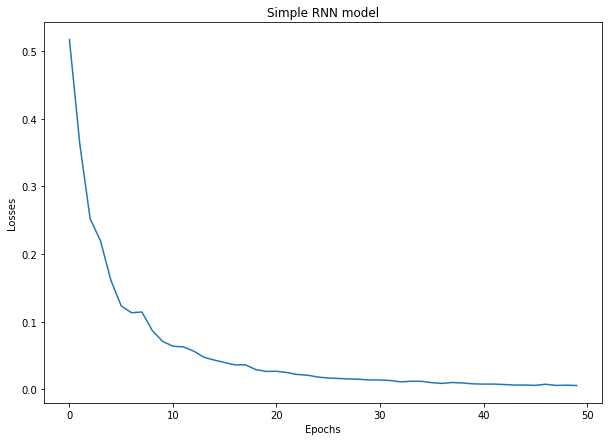

In [21]:
# 에폭대비 loss 값 비교
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model")
plt.show()

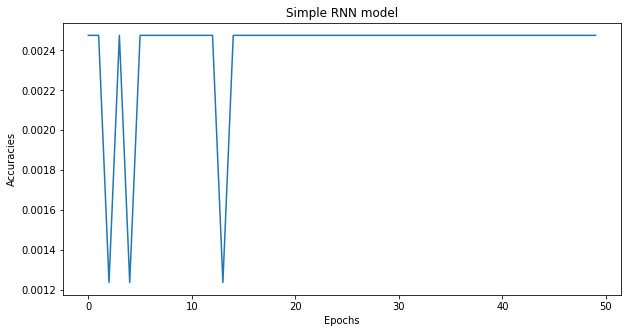

In [22]:
# 에폭대비 acuuracy 값 비교
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model")
plt.show()

# 초반에 잠깐 내려갔다가 이후에 0.0025로 고정되었다.

In [23]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original 예측값 -> 원래 값으로 변화 , 스케일링 상태에서 되돌림
y_pred.shape

26/26 [==============================] - 1s 25ms/step


(808, 1)

In [24]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(808, 1)

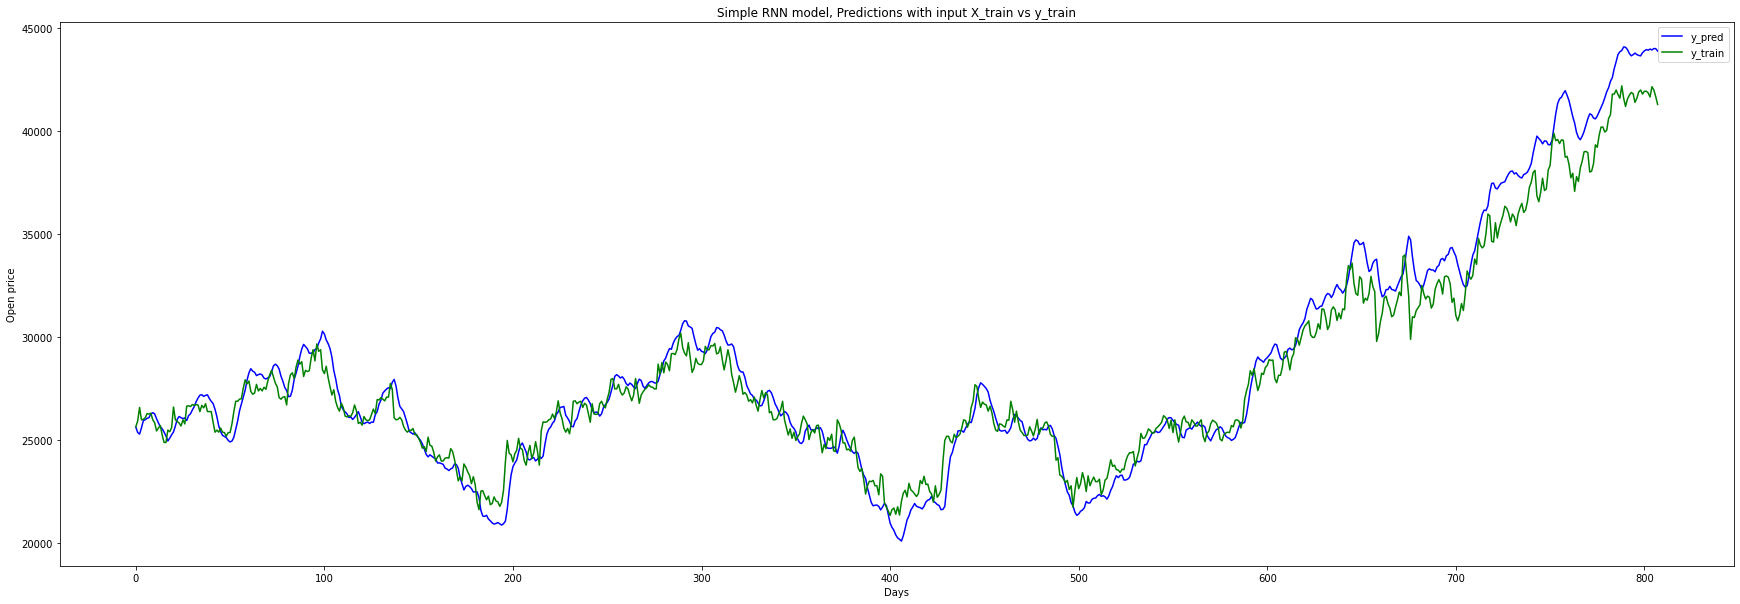

In [25]:
# 시각화(open price에 대한 모델 예측)
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [26]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (367, 1)


In [27]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [28]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [29]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (317, 50)
Shape of y_test before reshape : (317,)


In [30]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [31]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (317, 50, 1)
Shape of y_test after reshape : (317, 1)


In [32]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

10/10 [==============================] - 0s 16ms/step
Shape of y_pred_of_test : (317, 1)


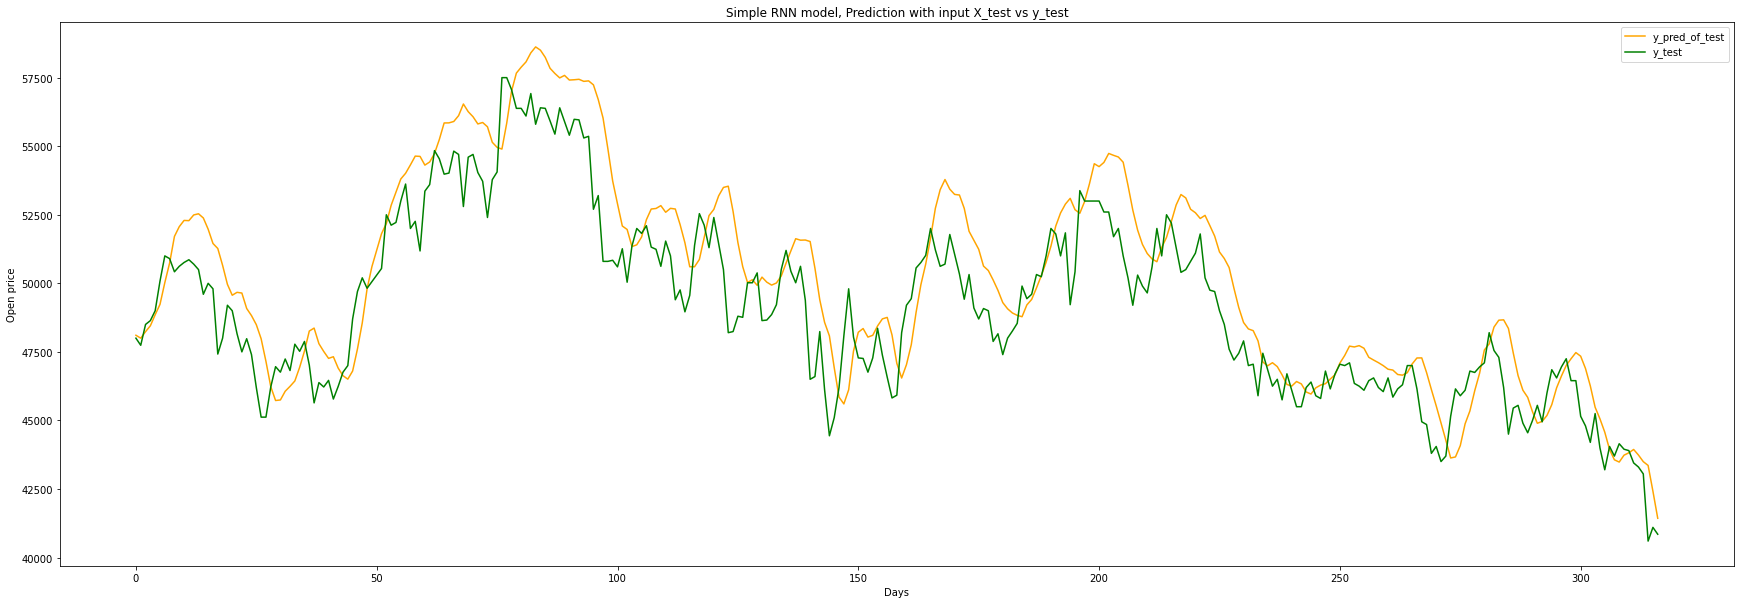

In [33]:
# 시각화 
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test") # 예측값과 실제값의 차이
plt.legend()
plt.show()

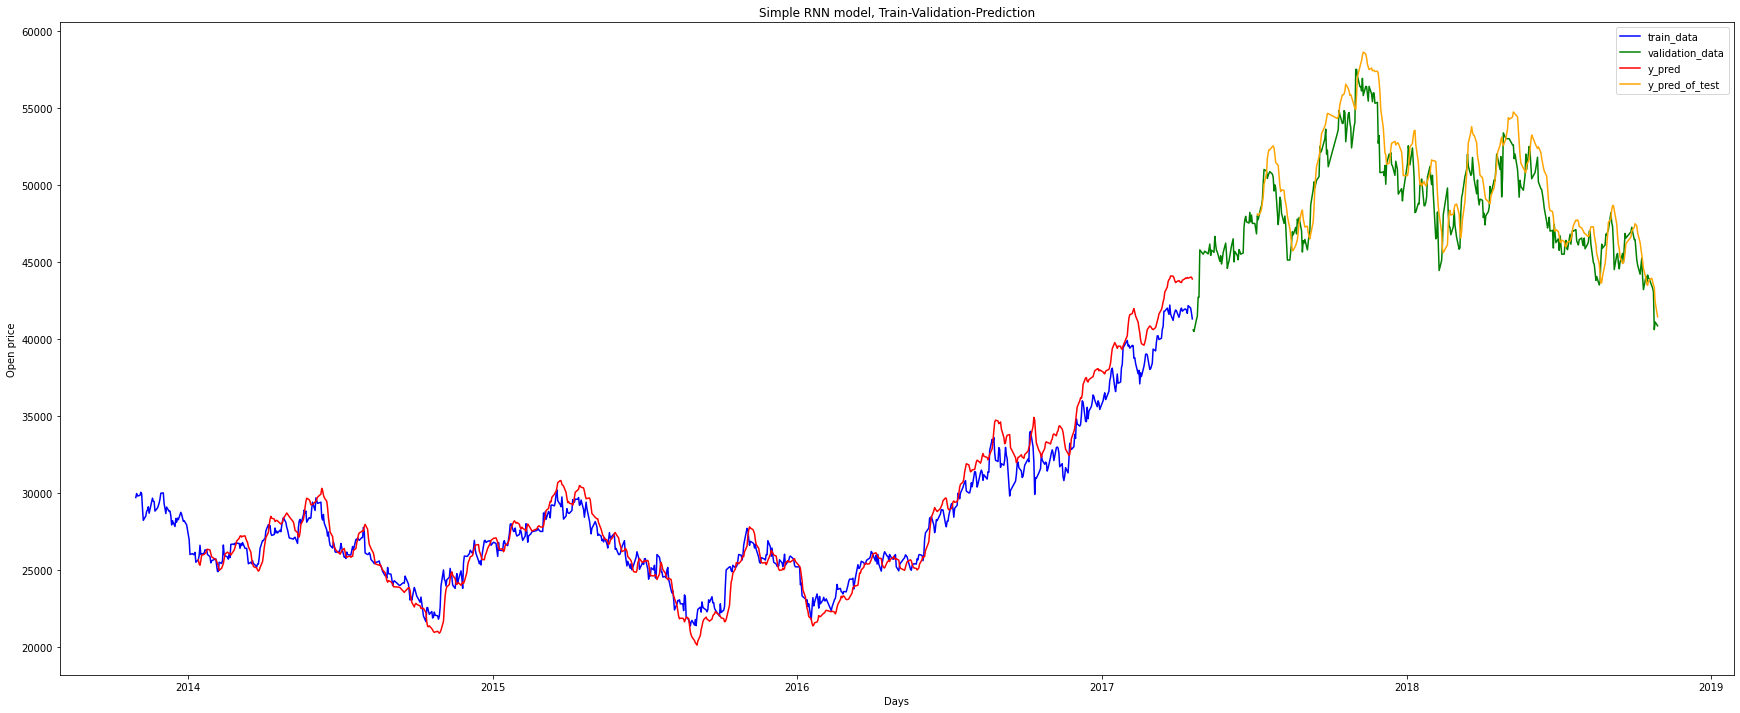

In [34]:
# 시각화 (train - validation - prediction)
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()